# Setup

Install missing packages

```{bash}

mamba install -c conda-forge -y cudatoolkit  gcc_linux-64=9.5.0 ipywidgets jupyter_contrib_nbextensions nodejs numba numpy plotly pycuda pythreejs  py-opencv

jupyter labextension install jupyter-threejs

```



# Diffusion limited aggregates

In this notebook, we will generate different types of self-affine fractal patterns using Python. Specifically, we will create Diffusion Limited Aggregation (DLA) models that resemble a lichen, a saprophyte, and a bryophyte.

Note: While GPU acceleration can significantly speed up computations, implementing DLA on a GPU is challenging due to the inherently serial and random nature of the algorithm. Therefore, we will use Numba's Just-In-Time (JIT) compilation to optimize our code for better performance.

## DLA resembling a lichen


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit, prange


In [24]:
# Grid size
grid_size = 1000

# Number of particles
num_particles = 200000

# Maximum steps per particle
max_steps = 1000000

# Initialize the grid
grid = np.zeros((grid_size, grid_size), dtype=np.float64)

# Set the seed particle at the center
center = grid_size // 2
grid[center, center] = 1


In [25]:
@njit(parallel=True)
def dla_simulation(grid, num_particles, max_steps):
    grid_size = grid.shape[0]
    center = grid_size // 2

    for n in prange(num_particles):
        # Start the particle at a random position on the boundary
        angle = 2 * np.pi * np.random.rand()
        x = int(center + (grid_size // 2 - 1) * np.cos(angle))
        y = int(center + (grid_size // 2 - 1) * np.sin(angle))

        for _ in range(max_steps):
            # Random movement
            direction = np.random.randint(4)
            if direction == 0 and x > 0:
                x -= 1  # Left
            elif direction == 1 and x < grid_size - 1:
                x += 1  # Right
            elif direction == 2 and y > 0:
                y -= 1  # Up
            elif direction == 3 and y < grid_size - 1:
                y += 1  # Down

            # Check if the particle is adjacent to the cluster
            if (grid[(x - 1) % grid_size, y] == 1 or
                grid[(x + 1) % grid_size, y] == 1 or
                grid[x, (y - 1) % grid_size] == 1 or
                grid[x, (y + 1) % grid_size] == 1):
                grid[x, y] = 1
                break
            # If the particle moves out of bounds, reposition it
            if x <= 0 or x >= grid_size - 1 or y <= 0 or y >= grid_size - 1:
                break


In [26]:
# Run the DLA simulation
dla_simulation(grid, num_particles, max_steps)


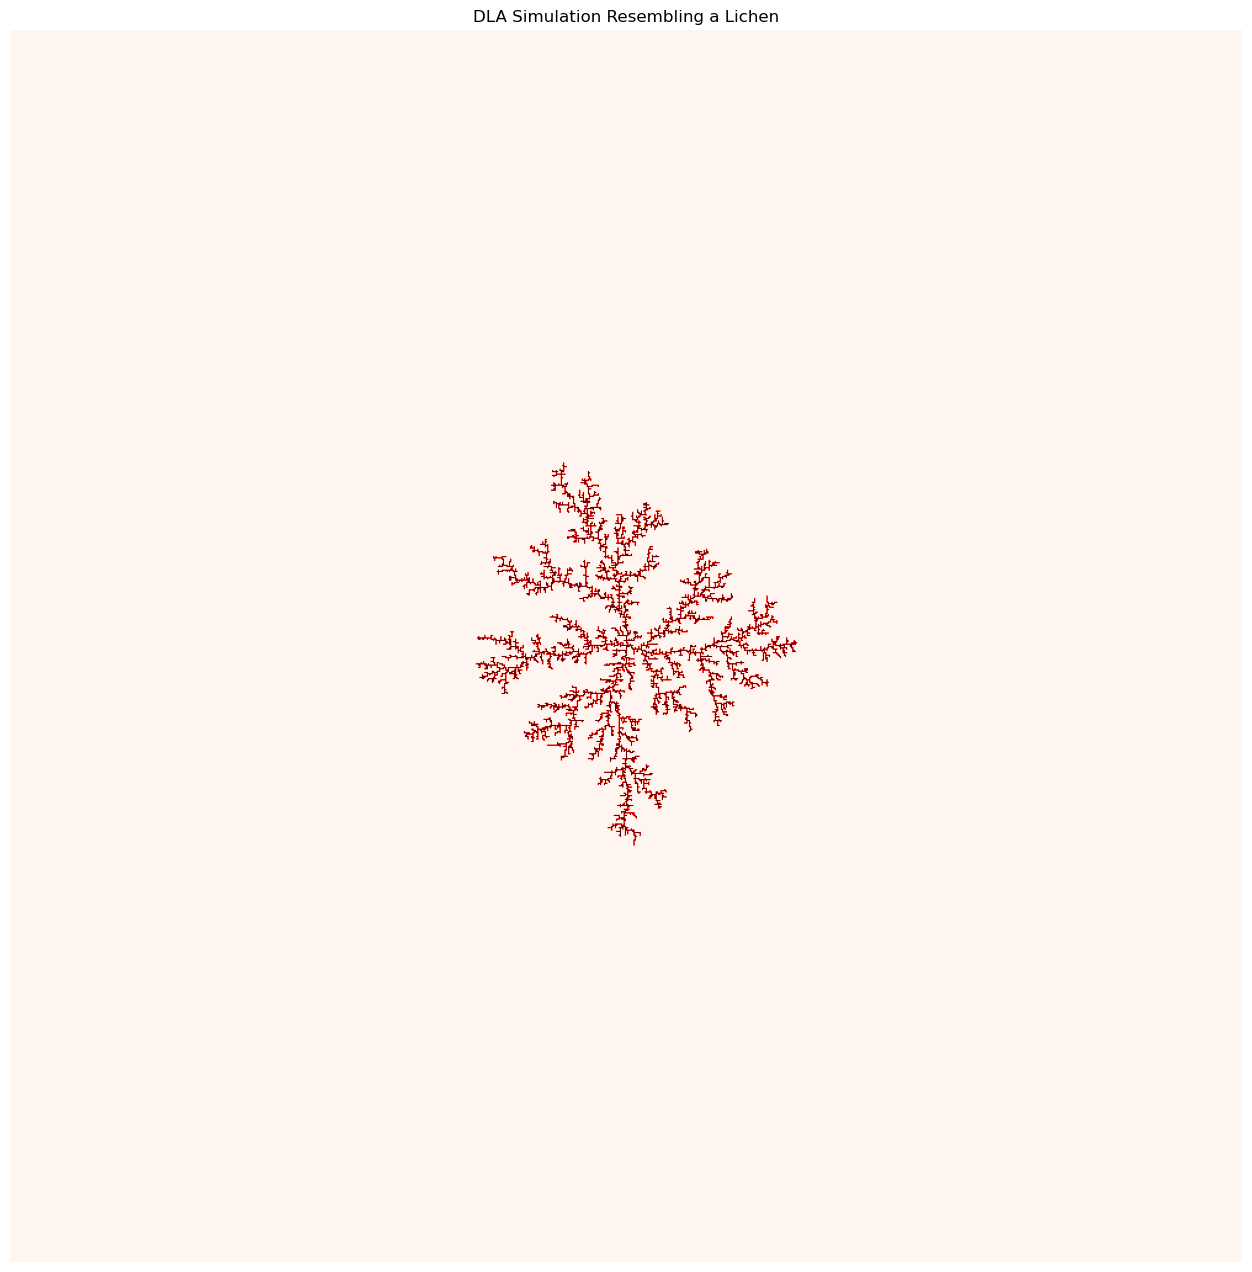

In [27]:
plt.figure(figsize=(16, 16))
plt.imshow(grid, cmap='Reds')
plt.axis('off')
plt.title('DLA Simulation Resembling a Lichen')
plt.show()


In [28]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact
from numba import njit

# DLA Simulation Function
@njit
def dla_simulation(grid_size, num_particles, max_steps):
    grid = np.zeros((grid_size, grid_size), dtype=np.float64)
    center = grid_size // 2
    grid[center, center] = 1

    for _ in range(num_particles):
        angle = 2 * np.pi * np.random.rand()
        x = int(center + (grid_size // 2 - 1) * np.cos(angle))
        y = int(center + (grid_size // 2 - 1) * np.sin(angle))

        for _ in range(max_steps):
            direction = np.random.randint(4)
            if direction == 0 and x > 0:
                x -= 1
            elif direction == 1 and x < grid_size - 1:
                x += 1
            elif direction == 2 and y > 0:
                y -= 1
            elif direction == 3 and y < grid_size - 1:
                y += 1

            if (grid[(x - 1) % grid_size, y] == 1 or
                grid[(x + 1) % grid_size, y] == 1 or
                grid[x, (y - 1) % grid_size] == 1 or
                grid[x, (y + 1) % grid_size] == 1):
                grid[x, y] = 1
                break

    return grid

# Plotting Function
def plot_dla(grid_size, num_particles, max_steps):
    grid = dla_simulation(grid_size, num_particles, max_steps)
    plt.figure(figsize=(16, 16))
    plt.imshow(grid, cmap='Reds')
    plt.axis('off')
    plt.title(f'DLA Simulation\nGrid Size: {grid_size}, Particles: {num_particles}, Max Steps: {max_steps}')
    plt.show()

# Sliders for interactive inputs
grid_size_slider = widgets.IntSlider(min=100, max=800, step=50, value=500, description='Grid Size')
num_particles_slider = widgets.IntSlider(min=1000, max=100000, step=5000, value=50000, description='Particles')
max_steps_slider = widgets.IntSlider(min=1000, max=2000000, step=1000, value=10000, description='Max Steps')

# Interactive widget display
interact(plot_dla, 
         grid_size=grid_size_slider, 
         num_particles=num_particles_slider, 
         max_steps=max_steps_slider)


interactive(children=(IntSlider(value=500, description='Grid Size', max=800, min=100, step=50), IntSlider(valu…

<function __main__.plot_dla(grid_size, num_particles, max_steps)>

In [29]:
import numpy as np
import plotly.graph_objects as go
import ipywidgets as widgets
from ipywidgets import interact
from numba import njit

# DLA Simulation Function
@njit
def dla_simulation(grid_size, num_particles, max_steps):
    grid = np.zeros((grid_size, grid_size), dtype=np.float64)
    center = grid_size // 2
    grid[center, center] = 1

    for _ in range(num_particles):
        angle = 2 * np.pi * np.random.rand()
        x = int(center + (grid_size // 2 - 1) * np.cos(angle))
        y = int(center + (grid_size // 2 - 1) * np.sin(angle))

        for _ in range(max_steps):
            direction = np.random.randint(4)
            if direction == 0 and x > 0:
                x -= 1
            elif direction == 1 and x < grid_size - 1:
                x += 1
            elif direction == 2 and y > 0:
                y -= 1
            elif direction == 3 and y < grid_size - 1:
                y += 1

            if (grid[(x - 1) % grid_size, y] == 1 or
                grid[(x + 1) % grid_size, y] == 1 or
                grid[x, (y - 1) % grid_size] == 1 or
                grid[x, (y + 1) % grid_size] == 1):
                grid[x, y] = 1
                break

    return grid

# Plotting Function using Plotly
def plot_dla(grid_size, num_particles, max_steps):
    grid = dla_simulation(grid_size, num_particles, max_steps)
    
    fig = go.Figure(data=go.Heatmap(
        z=grid, 
        colorscale='Greys',
        showscale=False
    ))

    fig.update_layout(
        title=f'DLA Simulation\nGrid Size: {grid_size}, Particles: {num_particles}, Max Steps: {max_steps}',
        width=800,
        height=800,
        xaxis=dict(showgrid=False, zeroline=False, visible=False),
        yaxis=dict(showgrid=False, zeroline=False, visible=False),
    )

    fig.show()

# Sliders for interactive inputs
grid_size_slider = widgets.IntSlider(min=100, max=800, step=50, value=500, description='Grid Size')
num_particles_slider = widgets.IntSlider(min=1000, max=1000000, step=5000, value=50000, description='Particles')
max_steps_slider = widgets.IntSlider(min=1000, max=1000000, step=1000, value=10000, description='Max Steps')

# Interactive widget display
interact(plot_dla, 
         grid_size=grid_size_slider, 
         num_particles=num_particles_slider, 
         max_steps=max_steps_slider)


interactive(children=(IntSlider(value=500, description='Grid Size', max=800, min=100, step=50), IntSlider(valu…

<function __main__.plot_dla(grid_size, num_particles, max_steps)>

## DLA Model Resembling a Saprophyte

In [29]:
@njit(parallel=True)
def dla_simulation_saprophyte(grid, num_particles, max_steps):
    grid_size = grid.shape[0]

    for n in prange(num_particles):
        # Start the particle at a random position at the bottom
        x = np.random.randint(0, grid_size)
        y = grid_size - 1

        for _ in range(max_steps):
            # Introduce upward bias
            prob = np.random.rand()
            if prob < 0.7 and y > 0:
                y -= 1  # Up
            elif prob < 0.85 and x > 0:
                x -= 1  # Left
            elif prob < 1.0 and x < grid_size - 1:
                x += 1  # Right

            # Check if the particle is adjacent to the cluster
            if (grid[x, (y - 1) % grid_size] == 1 or
                grid[(x - 1) % grid_size, y] == 1 or
                grid[(x + 1) % grid_size, y] == 1):
                grid[x, y] = 1
                break
            # Break if out of bounds
            if y <= 0:
                break


In [30]:
# Initialize the grid
grid_saprophyte = np.zeros((grid_size, grid_size), dtype=np.uint8)

# Set the seed particles at the bottom row
grid_saprophyte[:, grid_size - 1] = 1

# Run the DLA simulation with upward bias
dla_simulation_saprophyte(grid_saprophyte, num_particles, max_steps)


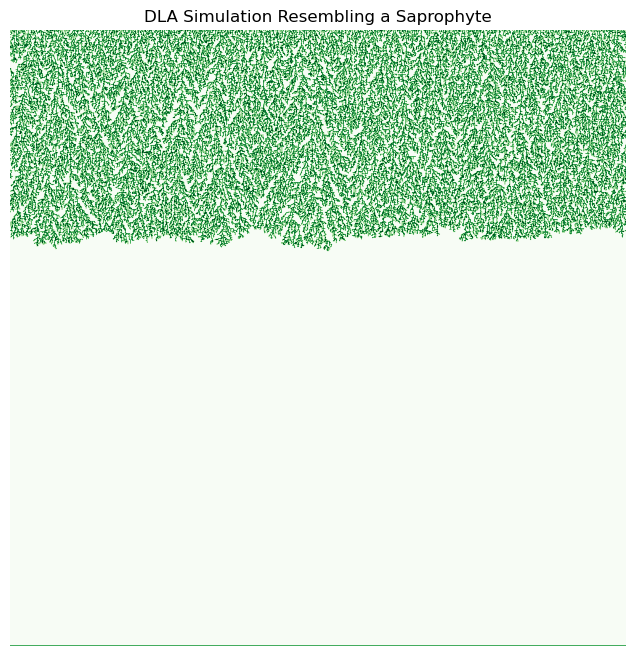

In [31]:
plt.figure(figsize=(8, 8))
plt.imshow(grid_saprophyte.T, cmap='Greens')
plt.axis('off')
plt.title('DLA Simulation Resembling a Saprophyte')
plt.show()


 ## DLA Model Resembling a Bryophyte

In [32]:
@njit(parallel=True)
def dla_simulation_bryophyte(grid, num_particles, max_steps):
    grid_size = grid.shape[0]
    center = grid_size // 2

    for n in prange(num_particles):
        # Start the particle near the bottom center
        x = np.random.randint(center - 50, center + 50)
        y = grid_size - 1

        for _ in range(max_steps):
            # Introduce upward and lateral bias
            prob = np.random.rand()
            if prob < 0.6 and y > 0:
                y -= 1  # Up
            elif prob < 0.8 and x > 0:
                x -= 1  # Left
            elif prob < 1.0 and x < grid_size - 1:
                x += 1  # Right

            # Check if the particle is adjacent to the cluster
            if (grid[x, (y - 1) % grid_size] == 1 or
                grid[(x - 1) % grid_size, y] == 1 or
                grid[(x + 1) % grid_size, y] == 1):
                # Introduce lower sticking probability to encourage branching
                if np.random.rand() < 0.5:
                    grid[x, y] = 1
                    break
            # Break if out of bounds
            if y <= 0:
                break


In [33]:
# Initialize the grid
grid_bryophyte = np.zeros((grid_size, grid_size), dtype=np.uint8)

# Set the seed particles at the bottom center
grid_bryophyte[center - 5:center + 5, grid_size - 1] = 1

# Run the DLA simulation for bryophyte
dla_simulation_bryophyte(grid_bryophyte, num_particles, max_steps)


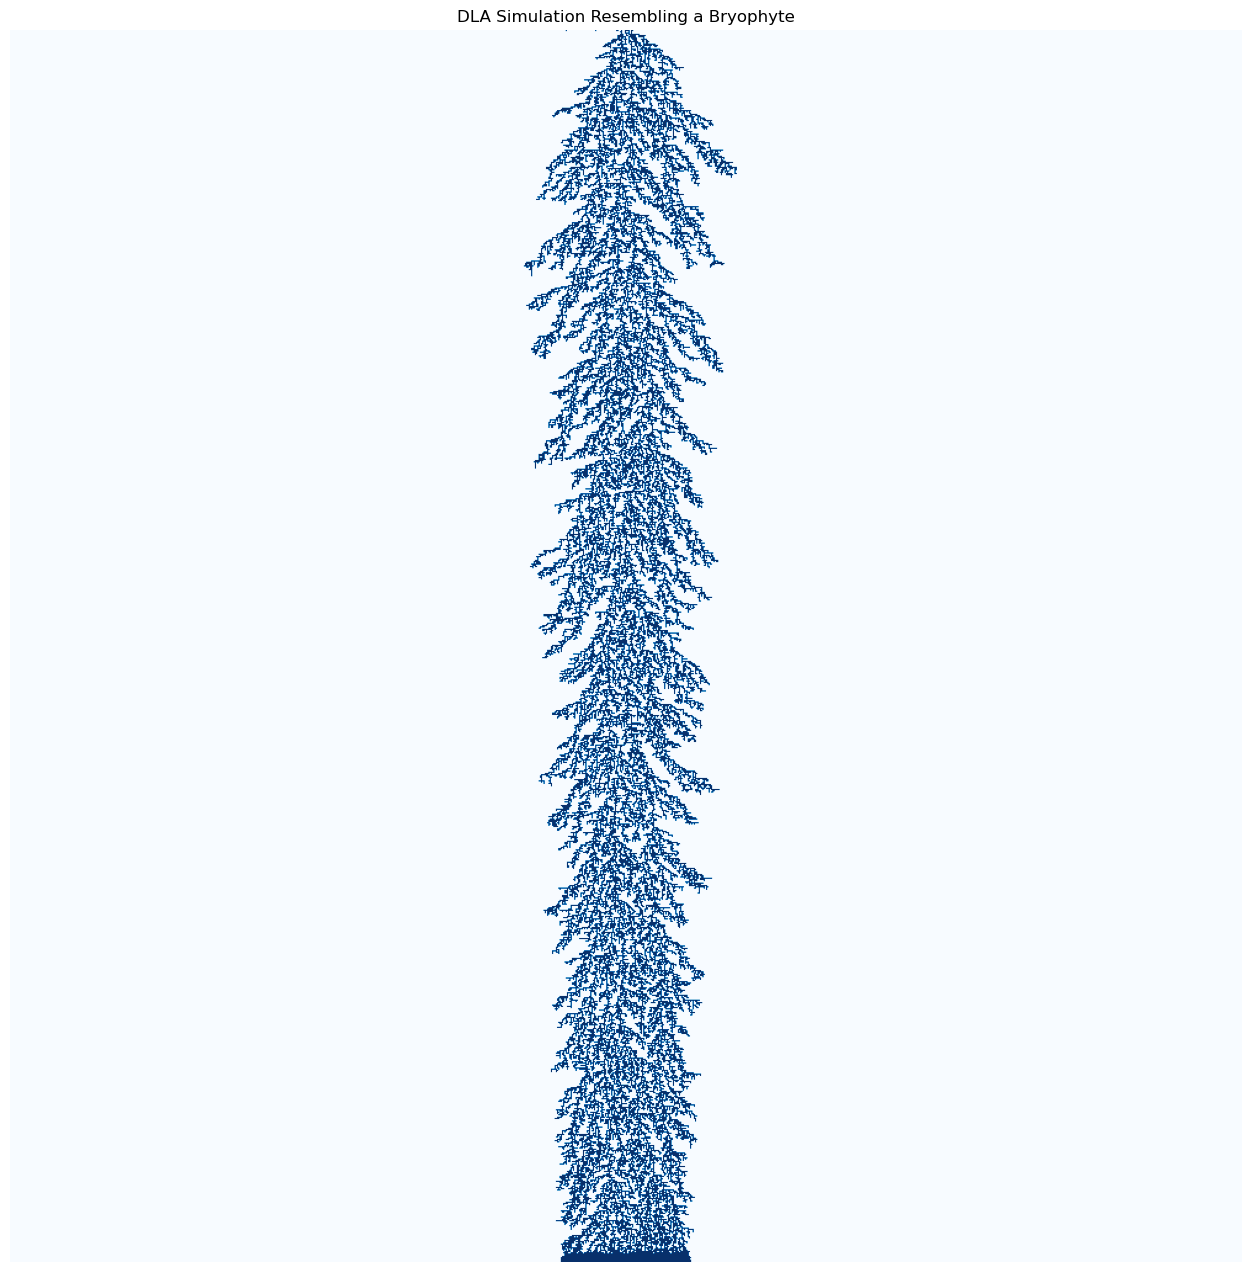

In [34]:
plt.figure(figsize=(16, 16))
plt.imshow(grid_bryophyte.T, cmap='Blues')
plt.axis('off')
plt.title('DLA Simulation Resembling a Bryophyte')
plt.show()
